# 0.2 NeuralNetwork Classification with pytorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

In [495]:
import torch
import matplotlib.pyplot as plt
from torch import nn
torch.__version__

'2.1.0+cu121'

###1. Make classification data and get it ready

In [496]:
import sklearn

In [497]:
from sklearn.datasets import make_circles

# Make 1000 samples

n_samples =1000

# Create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [498]:
len(X),len(y)

(1000, 1000)

In [499]:
print(f"First 5 samples of X \n:{X[:5]}\n")
print(f"First 5 samples of y \n: {y[:5]}")

First 5 samples of X 
:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y 
: [1 1 1 1 0]


In [500]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


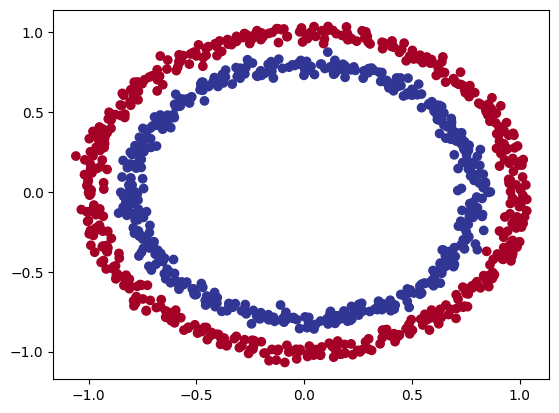

In [501]:
# Visualize, visualize, visualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** the data we're working with is often referred to as a toy dataset , a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

# 1.1  Check input and output shapes

In [502]:
X.shape,y.shape

((1000, 2), (1000,))

In [503]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [504]:
# viiew the first exampleof features and labels
X_sample= X[0]
y_sample = y[0]
print(f"Values for one sample of X :{X_sample} and the same for y :{y_sample} \n")
print(f"Shapes for one sample of x :{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X :[0.75424625 0.23148074] and the same for y :1 

Shapes for one sample of x :(2,) and the same for y:()


### 1.2 Turn data into tensor and create train and test splits

In [505]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [506]:
# Turn data into tensor
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [507]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [508]:
# split data into training and rest sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=42) # 0.2 = 20% oof data will be test & 80% will be train data
len(X_train),len(X_test),len(y_train),len(y_test)



(800, 200, 800, 200)

##2.  Building a model

Let's build a model to classify our blue and red dots

To do so , we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Consrtcut a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [509]:
# import pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnostic code, let's create a model that :

1. Subclasses `nn.Module` (almost all models in pytorch subclass 'nn.Module')
2. Create 2  `nn.Linear()` layers that are capable of handling the shapes if our data  
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instatiate an instance of our model class and send it to the target device

In [510]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1= nn.Linear(in_features=2,  # takes in 2 features and upscales to 5 features
                            out_features=5)
    self.layer_2=nn.Linear(in_features=5,   # takes in 5 features from previous layer and outputs a single feature (same shape as y)
                           out_features=1)

    # 3. Define a forward() method taht outlinews the forward pass
    def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
# 4. Instantiate an instance of our model class and send it to the target device
model_0= CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [511]:
next(model_0.parameters()).device

device(type='cpu')

In [512]:
# let's replicate the model above using nn.sequential()\
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [513]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [514]:
#Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"lenght of predictions : {len(untrained_preds)}, Shape :{untrained_preds.shape}")
print(f"Lenght of test samples : {len(X_test)},Shape : {X_test.shape}")
print(f"\n First 10 predictions :\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

lenght of predictions : 200, Shape :torch.Size([200, 1])
Lenght of test samples : 200,Shape : torch.Size([200, 2])

 First 10 predictions :
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again...this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error ).

For Classification you might want binary cross entropy or categorical cross entropy(cross entropy).

As a reminder, the loss function mearsures how *wrong* your models predictions are

And for optimizers, two of the momst common and useful are SGD and Adam, however Pytorch has many built in options


* For some common choices of loss function and optimizer -https://www.learnpytorch.io/02_pytorch_classification/







In [515]:
# Setup the loss function
# loss_fn = nn.BCELoss()

loss_fn= nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation function built-in

optimizer =  torch.optim.SGD(params= model_0.parameters(),
                             lr=0.01)


In [516]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [517]:
# calculate accuracy - out of 100 examples , what percentage does our model get right ?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc


accuracy_fn

<function __main__.accuracy_fn(y_true, y_pred)>

### 3. Train model

To train our model, we're going to need to bulid a training loop with the following steps:
1.  Forward pass
2.  loss calculation
3.  optimizer zero grad
4.  loss backward ( backpropagation)
5.  Optimizer step (gradient descent )

### 3.1  Going from raw logits -> prediction probabilities -> prediction labels

our model ouputs are going to be raw **logits**.

we can convert these **logits** into **prediction probabilities** by passing them to some some kind of activation function(e.g. sigmoid for binary classification and softmax for mutliclass classification ).

Then we can convert our model's **prediction labels** by either rounding them or taking the `argmax()`

In [518]:
# view the first 5 outputs of the forward pass oon the test data
model_0.state_dict()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853]])

In [519]:
# Use the sigmoid activation function on our model logits to turn then into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5809],
        [0.5779],
        [0.5725],
        [0.5834],
        [0.5462]])

For our prediction probability values, we nees to perform a range - style rounding on them:
* `y_pred_probs` >= 0.5 , `y=1` (class 1 )
* `y_pred_probs`< 0.5 , `y=0` (class 0)

In [520]:
# Find the prediction labels
y_preds= torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

### 3.2 Building a training and testing loop

In [521]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of  epochs
epochs= 1000

# put data to target device
X_train,y_train= X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
# build training and evaluation loop

for epoch in range(epochs):
  # Training
  model_0.train()

  # 1. Forward pass
  y_logits= model_0(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits)) #  turn logits -> pred probs -> pred labels

  # 2.Calculate loss / accuracy
  #loss= loss_fn(torch.sigmoid(y_logits),  ## nn.BCELoss expects prediction probabilities as input
  #            y_train)


  loss = loss_fn(y_logits,   # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true= y_train,
                    y_pred= y_pred)

  # 3 Optimizer zero grad
  optimizer.zero_grad()   #

  # 4.loss backward
  loss.backward()

  #5 optimizer step  (gradient descent)
  optimizer.step()


  # testing loop
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Calculate test loss /acc

    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true = y_test,
                           y_pred= test_pred)

  # print out what's happenin'
  if epoch%10==0:
    print(f"Epochs: {epoch} | Loss: {loss:.5f}, | Acc: {acc:.2f}% | Test loss:{test_loss:.5f}, Test acc {test_acc:.2f}%")


Epochs: 0 | Loss: 0.70175, | Acc: 50.00% | Test loss:0.70252, Test acc 50.00%
Epochs: 10 | Loss: 0.70118, | Acc: 50.00% | Test loss:0.70194, Test acc 50.00%
Epochs: 20 | Loss: 0.70065, | Acc: 50.00% | Test loss:0.70139, Test acc 50.00%
Epochs: 30 | Loss: 0.70016, | Acc: 50.00% | Test loss:0.70088, Test acc 50.00%
Epochs: 40 | Loss: 0.69970, | Acc: 50.00% | Test loss:0.70041, Test acc 50.00%
Epochs: 50 | Loss: 0.69927, | Acc: 50.00% | Test loss:0.69997, Test acc 50.00%
Epochs: 60 | Loss: 0.69887, | Acc: 50.00% | Test loss:0.69955, Test acc 50.00%
Epochs: 70 | Loss: 0.69850, | Acc: 50.00% | Test loss:0.69917, Test acc 50.00%
Epochs: 80 | Loss: 0.69816, | Acc: 50.00% | Test loss:0.69881, Test acc 50.00%
Epochs: 90 | Loss: 0.69784, | Acc: 50.00% | Test loss:0.69847, Test acc 50.00%
Epochs: 100 | Loss: 0.69754, | Acc: 50.00% | Test loss:0.69816, Test acc 50.00%
Epochs: 110 | Loss: 0.69726, | Acc: 50.00% | Test loss:0.69787, Test acc 50.00%
Epochs: 120 | Loss: 0.69700, | Acc: 50.00% | Test l

## 4. Make predictions and evaluate the model

From the metrice it looks like our model isn't learning anything ....

So to inspect it let's make some predictions and make them visual !

In other words , "visualize", "visualize", "Visualize"

To do so we're going to import a function called `plot_decision_boundary()-` https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [522]:
import requests
from pathlib import Path

# Download helper functions from Learn pyTorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_funtions.py already exists,skippinng download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f :
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_funtions.py already exists,skippinng download


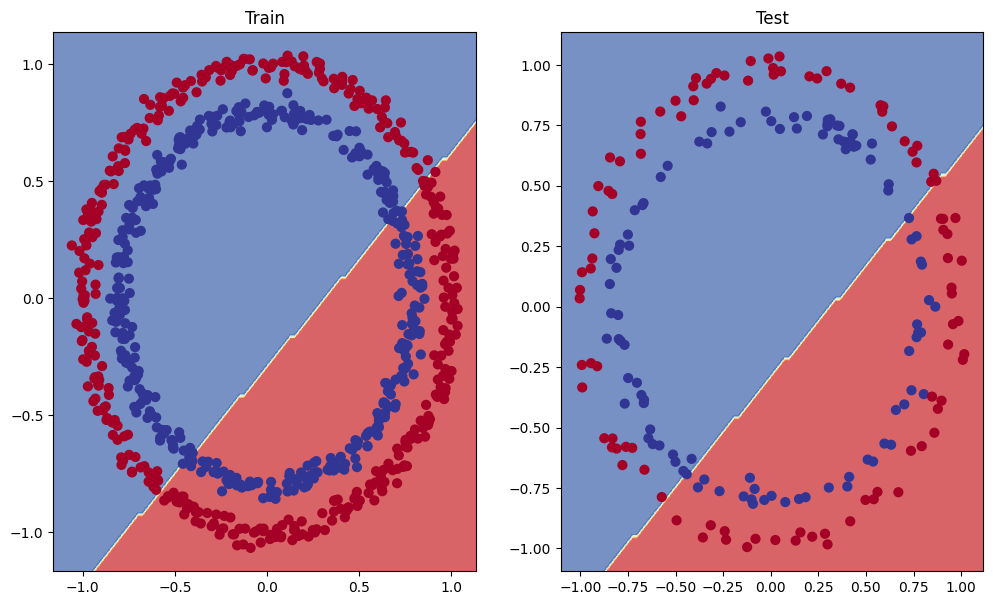

In [523]:
# Plot decision boundary of the model
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Imporving a model (from a model perspective)

*  Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perpective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists ) can change, they are referred as **hyperparameters**

let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of Layers: 2-> 3
* Increase the number of epochs 100-> 1000

In [524]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2,out_features=10)  # in_features = 2 because shape of X has two col
    self.layer_2= nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features= 10, out_features=1) # out_features = 1 because shape of y has one col

  def forward(self,x) :
    #z= self.layer_1(x)
    #z= self.layer_2(z)
    #z= self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))  # This way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [525]:
# Create a loss function
loss_fn= nn.BCEWithLogitsLoss()
# Create a Optimizer
optimizer= torch.optim.SGD(params = model_1.parameters(),
                            lr= 0.1)

In [526]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [527]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000
X_train,y_train= X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits_preds= model_1(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits)) #  logits -> pred probabilities -> prediction label

  # 2. Calculate the Loss /  Accurancy
  loss= loss_fn(y_logits,y_train)
  acc= accuracy_fn(y_true = y_train,
                   y_pred= y_pred)

  # 3. Optimizer Zero grad
  optimizer.zero_grad()

  # 4. backward propagation
  # loss.backward()

  # 5. optimizer steps (gradient descent )
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits= model_1(X_test).squeeze()
    test_preds= torch.round(torch.sigmoid(test_logits))

    # 2. loss calculation / accurancy
    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true= y_test,
                           y_pred= test_pred)
  if epoch % 1000 == 0:
    print(f"Epochs:{epoch}, | Train_Loss :{loss:.5f} | Train_accuracy: {acc:.2f}% | Test_loss {test_loss:.5f} |Test _acc= {test_acc:.2f}%")



Epochs:0, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:1000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:2000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:3000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:4000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:5000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:6000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:7000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:8000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%
Epochs:9000, | Train_Loss :0.69317 | Train_accuracy: 51.25% | Test_loss 0.69261 |Test _acc= 51.00%


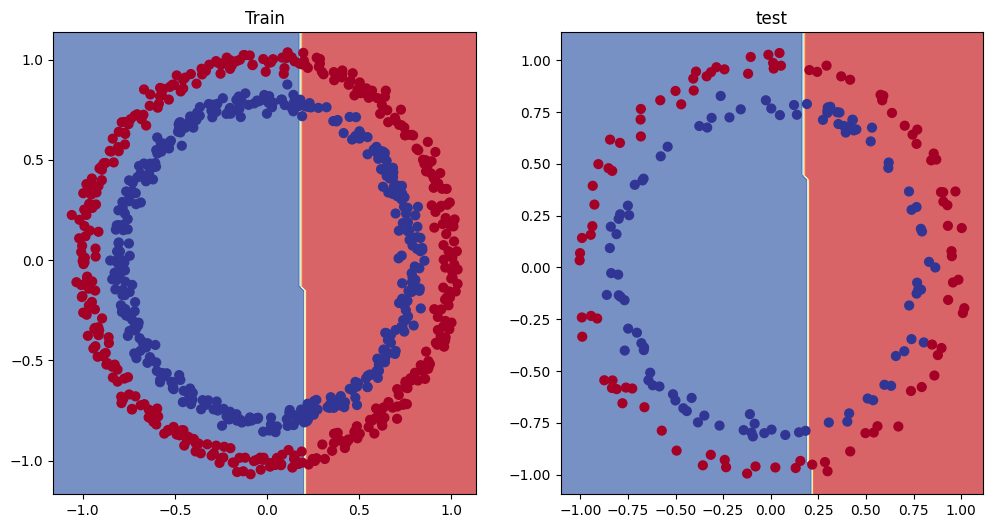

In [528]:
# plot decision boundqary of the model
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [529]:
# Create some data (same as notebook 01 )
weight = 0.7
bias = 0.3
start= 0
end = 1
step = 0.01
X_regression= torch.arange(start,end,step).unsqueeze(dim=1)

y_regression = weight *X_regression+ bias
# X_regression[:10],y_regression[:10]
len(y_regression)

100

In [530]:
# create train and test split
train_split= int(0.8* len(X_regression))
train_split
X_train_regression,y_train_regression= X_regression[:train_split], y_regression[:train_split]
X_test_regression,y_test_regression= X_regression[train_split:],y_regression[train_split:]
len(X_train_regression), len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

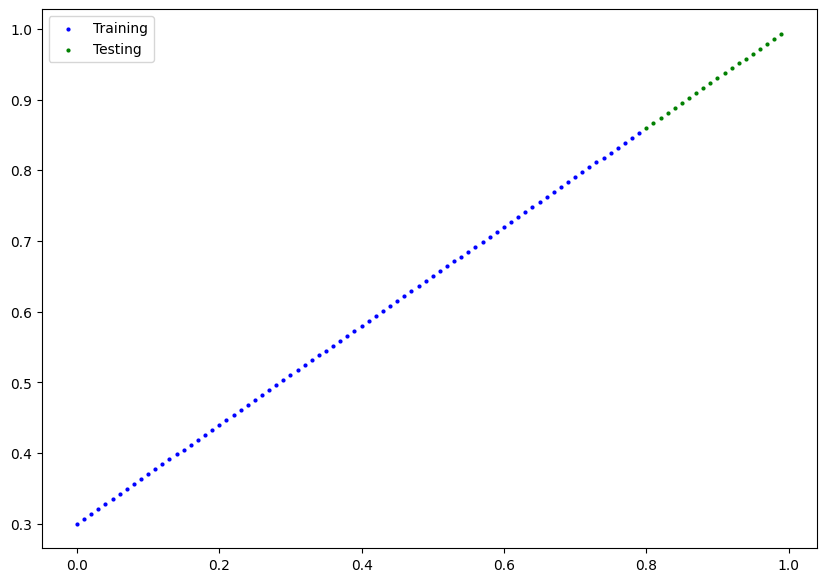

In [531]:
# Building Model

def plot_predictions(train_data = X_train_regression,
                     train_labels= y_train_regression,
                     test_data= X_test_regression,
                     test_labels= y_test_regression,
                     predictions = None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c = "b", s= 4 , label="Training")
  plt.scatter(test_data, test_labels, c = "g", s=4 , label = "Testing")

  if predictions is not None :
    plt.scatter(predictions,test_data,c = "r", s =4, label= "predictions")

  plt.legend()


plot_predictions()

In [532]:
X_train_regression[:10]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

### 5.2  Adjusting `model_1` to fit a straight line


In [533]:
# same architecture as model_1 (but using nn.sequential())
model_2 = nn.Sequential(
  nn.Linear(in_features= 1,out_features= 10),
  nn.Linear(in_features = 10,out_features=10),
  nn.Linear(in_features = 10 ,out_features =1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [534]:
# loss and optimizer

loss_fn = nn.L1Loss()

# Create a opimizer
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.01)

In [535]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train_regression,y_train_regression= X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression= X_test_regression.to(device), y_test_regression.to(device)

epochs = 1000
for epoch in range(epochs):
  # training
 #   model_2.train()

  # 1. forward pass
  y_pred = model_2(X_train_regression)

  # 2. culculate the Loss
  loss = loss_fn(y_pred,y_train_regression)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward()   backpropagations
  loss.backward()

  # 5. step gradient descent
  optimizer.step()

  # testing

  model_2.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_pred = model_2(X_test_regression)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch % 100 == 0 :
    print(f"Epochs: {epoch} | loss:{loss:.5f} |Test loss {test_loss:.5f} | ")




Epochs: 0 | loss:0.75986 |Test loss 0.91103 | 
Epochs: 100 | loss:0.02858 |Test loss 0.00081 | 
Epochs: 200 | loss:0.02533 |Test loss 0.00209 | 
Epochs: 300 | loss:0.02137 |Test loss 0.00305 | 
Epochs: 400 | loss:0.01964 |Test loss 0.00341 | 
Epochs: 500 | loss:0.01940 |Test loss 0.00387 | 
Epochs: 600 | loss:0.01903 |Test loss 0.00379 | 
Epochs: 700 | loss:0.01878 |Test loss 0.00381 | 
Epochs: 800 | loss:0.01840 |Test loss 0.00329 | 
Epochs: 900 | loss:0.01798 |Test loss 0.00360 | 


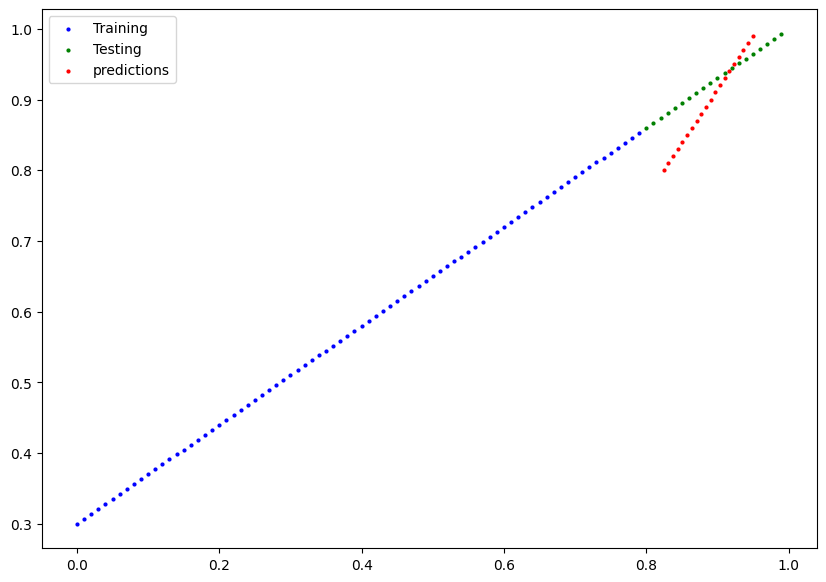

In [536]:
model_2.eval()
with torch.inference_mode():
  y_preds= model_2(X_test_regression)

y_preds
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels= y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions= y_preds.cpu())

## 6. The missing piece : non linearity

"What patterns could you draw if you were given an infinite amount of a straight and non straight lines?"

Or in machine learning terms , an infinite (but really it is finite) of linear functions ?




### 6.1 recreating non- linear data (red and blue circles)

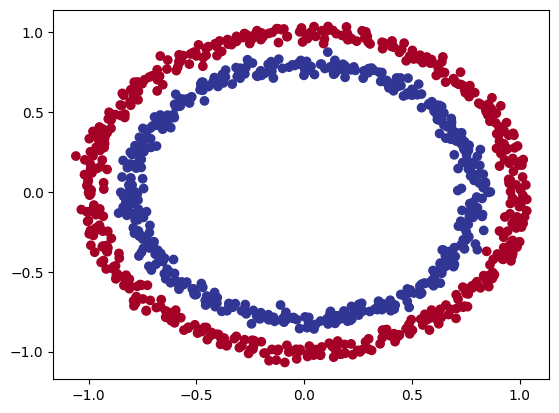

In [537]:
# Make and Plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000
X,y= make_circles(n_samples,
                  noise= 0.03,
                  random_state=42)
plt.scatter(X[:,0],X[:,1], c= y ,cmap=plt.cm.RdYlBu)

In [538]:
from sklearn.model_selection import train_test_split

# Turn data into tensor
X=torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


# split into trai and test sets

X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=42
                                                )
X_train[:10],y_train[:10]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994],
         [-0.8837, -0.4678],
         [-0.3836,  0.6987],
         [ 0.6047,  0.5163],
         [-0.5869,  0.7804],
         [ 0.8833, -0.5178]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.]))

### 6.2 Building a model with non linearity

* Linear = straight lines
* Non -linearity - non straight lines

Artificial neural networks are a large combination of linear (straight ) and non- linear(non - straight) functions which are potentially able to find patterns in data

In [539]:
# Build a model with non linear activation functions

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1= nn.Linear(in_features = 2 , out_features= 10)

    self.layer_2 = nn.Linear(in_features = 10, out_features =10)

    self.layer_3 = nn.Linear(in_features = 10 ,out_features = 1)
    self.relu = nn.ReLU() # relu is a non- linear activation function


  def forward(self,x):
    # where should we put our non- linear activation function ?
    return self.layer_3(self.relu(self.layer_2(self.relu((self.layer_1(x))))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [540]:
# Setup Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_3.parameters(),
                           lr=0.1)

In [541]:
# Application of binary classification
# spam or not spam
# Credit cards = fraud or not fraud
# insurance claim = at fault or not fault


## 6.3 Training a model with non- linearity


In [542]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data oon target device
X_train,y_train= X_train.to(device),y_train.to(device)
X_test,y_test= X_test.to(device),y_test.to(device)

# loop through data

epochs= 10000

for epoch in range(epochs):
  model_3.train()
  #1.Forward pass
  y_logits= model_3(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  #2.calculate the loss / acc
  loss = loss_fn(y_logits,y_train)  # BCEWithLogitsLoss(takes in logits as first input)

  acc= accuracy_fn(y_true = y_train,
                   y_pred = y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. backpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():

    # forward pass
    test_logits= model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss /aa
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true= y_test,

                           y_pred= test_pred)

    if epoch%1000 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f} | acc= {acc:.2f}% | Test Loss {test_loss:.5f} | Test_acc = {test_acc:.2f}%")


Epoch: 0 | loss: 0.69295 | acc= 50.00% | Test Loss 0.69319 | Test_acc = 50.00%
Epoch: 1000 | loss: 0.56818 | acc= 87.75% | Test Loss 0.57378 | Test_acc = 86.50%
Epoch: 2000 | loss: 0.04176 | acc= 99.88% | Test Loss 0.06583 | Test_acc = 100.00%
Epoch: 3000 | loss: 0.01672 | acc= 99.88% | Test Loss 0.03363 | Test_acc = 100.00%
Epoch: 4000 | loss: 0.01048 | acc= 100.00% | Test Loss 0.02451 | Test_acc = 99.50%
Epoch: 5000 | loss: 0.00765 | acc= 100.00% | Test Loss 0.01993 | Test_acc = 99.50%
Epoch: 6000 | loss: 0.00603 | acc= 100.00% | Test Loss 0.01726 | Test_acc = 99.50%
Epoch: 7000 | loss: 0.00499 | acc= 100.00% | Test Loss 0.01557 | Test_acc = 99.50%
Epoch: 8000 | loss: 0.00428 | acc= 100.00% | Test Loss 0.01451 | Test_acc = 99.50%
Epoch: 9000 | loss: 0.00375 | acc= 100.00% | Test Loss 0.01374 | Test_acc = 99.50%


### 6.4 Evaluating a model trained with non- linear activation functions




In [543]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds,y_test

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
         1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
         1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
         0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
         1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
         1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
         1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
         1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
         

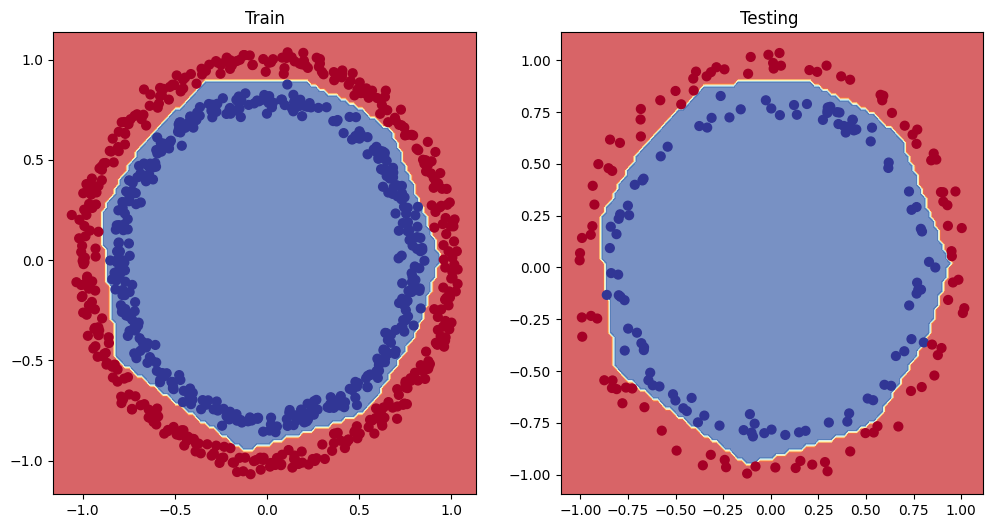

In [544]:
# plot decision boundaries      model_1 = no non-linearity  model_3 = has non- linearity
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing ")
plot_decision_boundary(model_3, X_test, y_test)

## 7 . Replicating non- Linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figures out the patterns on its own

And these tools are linear & non - linear functions.


In [545]:
# create a tensor
A= torch.arange(-10,10,1, dtype = torch.float32)
A.dtype,len(A)

(torch.float32, 20)

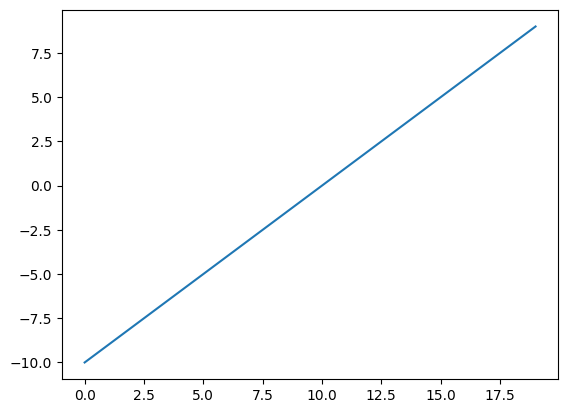

In [546]:
plt.plot(A)

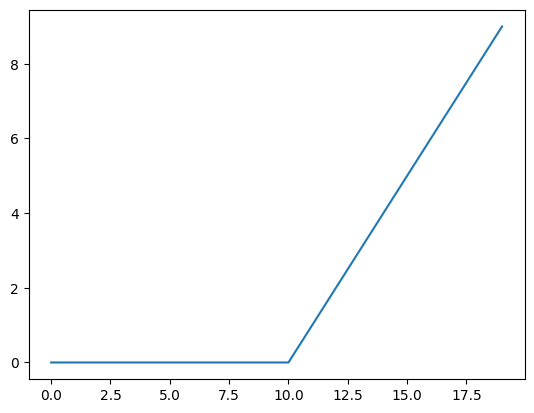

In [547]:
plt.plot(torch.relu(A));

In [548]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [549]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # inputs must be tensors
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

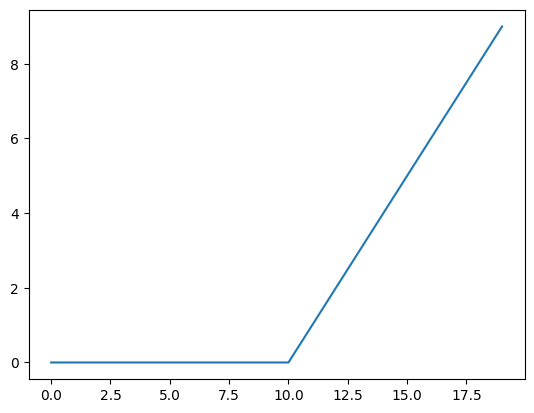

In [550]:
plt.plot(relu(A))

In [551]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

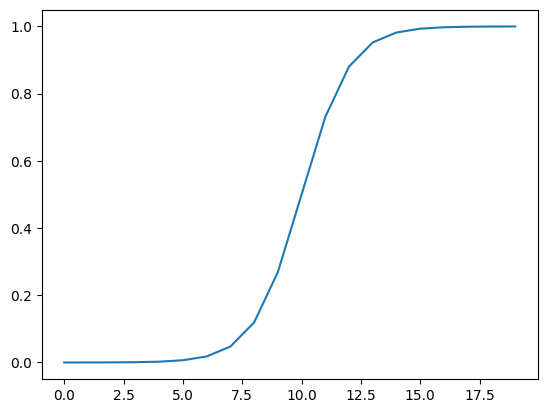

In [552]:
plt.plot(torch.sigmoid(A))

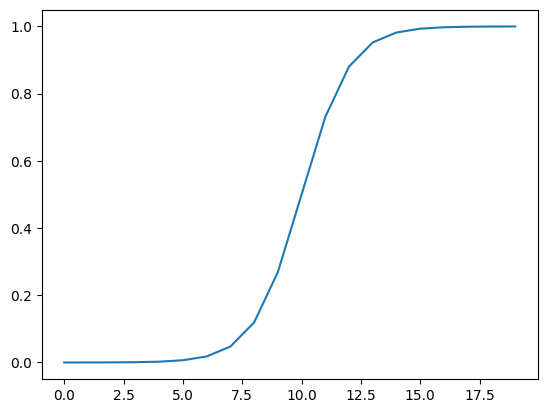

In [553]:
plt.plot(sigmoid(A))

##8. Putting it all together with a multi- class classification problem

* Binary classification = one thing or another (Cat vs. dog , spam cs. not spam , fraud vs not fraud)
* Multi-class classification = more than one thing or another (cat vs.dog vs. chicken)

### 8.1 creating a toy multi-class dataset

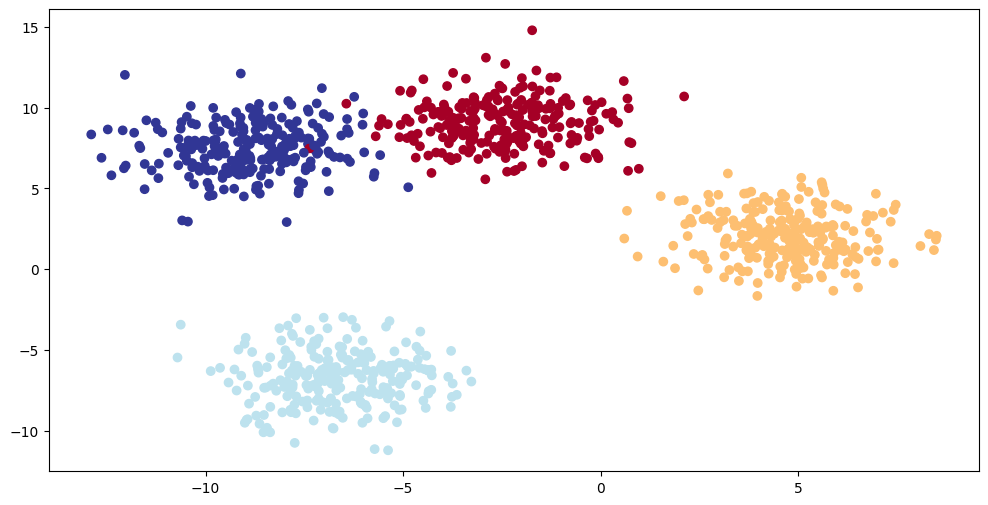

In [554]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs   # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES =4
NUM_FEATURES=2
RANDOM_SEED= 42

#1. Create multi- class data
X_blob,y_blob = make_blobs(n_samples= 1000,
                           n_features= NUM_FEATURES,
                           centers= NUM_CLASSES,
                           cluster_std= 1.5,            # give the clusters a little shake
                           random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test= train_test_split(X_blob,
                                                y_blob,
                                                test_size=0.2,
                                                random_state=42)

len(X_train),len(y_train),len(X_test),len(y_test)


# plot data (visualize, visualize, visualize)

plt.figure(figsize=(12,6))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap= plt.cm.RdYlBu)


#8.2  Building a multi- class classification model in pyTorch


In [555]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [556]:
# Build a multi- class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initializes multi- class classification model.
      Args:
      input_features(int):Number of input features to the model
      output_features(int):Number of outputs features (number of output classes)
      hidden units(int): Number of hidden units between layers,default = 8

      Returns:
      Example:
      """
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features= output_features)
    )
  def forward(self,x) :
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,output_features=4)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [557]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [558]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification



In [559]:
# Create a loss function for multi-class classification - loss function measures how wrong our model's predictions are
loss_fn= nn.CrossEntropyLoss()

# create a optimizer for multi- class classification -optimizer updates our model parameters to try and reduce the loss
optimizer= torch.optim.SGD(params=model_4.parameters(),
                           lr= 0.1) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multi class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to predictions probabilities and then to prediction labels.


Logits -> Pred probs-> Pred labels


In [560]:
# let's get some raw outputs of our model (Logits)
model_4.eval()
with torch.inference_mode():
  y_logits= model_4(X_blob_test.to(device))

y_logits[:10]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [561]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [562]:
# convert our model's logit outputs to predictions probabilities

y_pred_probs =torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [563]:
y_preds= torch.argmax(y_pred_probs,dim=1 )
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [564]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## 8.5 Creating a training and testing loop for a multi-class PyTorch model


In [565]:
# Fit the multi- class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# put data to the traget device
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test= X_blob_test.to(device),y_blob_test.to(device)

# loop through data
for epoch in range(epochs):
  # Training
  model_4.train()

  # 1. Forward pass
  y_logits= model_4(X_blob_train).squeeze()

  y_pred = torch.softmax(y_logits,dim= 1).argmax(dim=1)

  # 2. calculate the loss
  loss= loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred= y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. optimizer step or gradient descent
  optimizer.step()

  # Tetsing

  model_4.eval()

  with  torch.inference_mode():
    # 1. forward pass
    y_test_logits= model_4(X_blob_test).squeeze()
    y_test_pred= torch.softmax(y_test_logits,dim=1).argmax(dim=1)

    # 2. calculate the loss
    test_loss = loss_fn(y_test_logits,y_blob_test)
    test_acc= accuracy_fn(y_true= y_blob_test,
                          y_pred= y_test_pred)

  if epoch % 10 == 0:
    print(f"Epoch:{epoch} |loss= {loss:.5f} | Acc:  {acc:.2f}% | Loss test:  {test_loss:.5f} | Test_acc : {test_acc:.2f}%")


Epoch:0 |loss= 1.15883 | Acc:  40.38% | Loss test:  1.07554 | Test_acc : 48.00%
Epoch:10 |loss= 0.64476 | Acc:  96.75% | Loss test:  0.66069 | Test_acc : 97.50%
Epoch:20 |loss= 0.42535 | Acc:  98.50% | Loss test:  0.43074 | Test_acc : 100.00%
Epoch:30 |loss= 0.25294 | Acc:  99.12% | Loss test:  0.24508 | Test_acc : 99.50%
Epoch:40 |loss= 0.11232 | Acc:  99.25% | Loss test:  0.10229 | Test_acc : 99.50%
Epoch:50 |loss= 0.06627 | Acc:  99.25% | Loss test:  0.05848 | Test_acc : 99.50%
Epoch:60 |loss= 0.05068 | Acc:  99.25% | Loss test:  0.04293 | Test_acc : 99.50%
Epoch:70 |loss= 0.04300 | Acc:  99.25% | Loss test:  0.03491 | Test_acc : 99.50%
Epoch:80 |loss= 0.03836 | Acc:  99.25% | Loss test:  0.02988 | Test_acc : 99.50%
Epoch:90 |loss= 0.03525 | Acc:  99.25% | Loss test:  0.02663 | Test_acc : 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi- class model

In [566]:
model_4.eval()
with torch.inference_mode():
  y_logits= model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [567]:
# Go from logits -> prediction probabilities
y_pred_probs= torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [568]:
# Go grom pred probs to pred labels
y_preds= torch.argmax(y_pred_probs,dim= 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [569]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

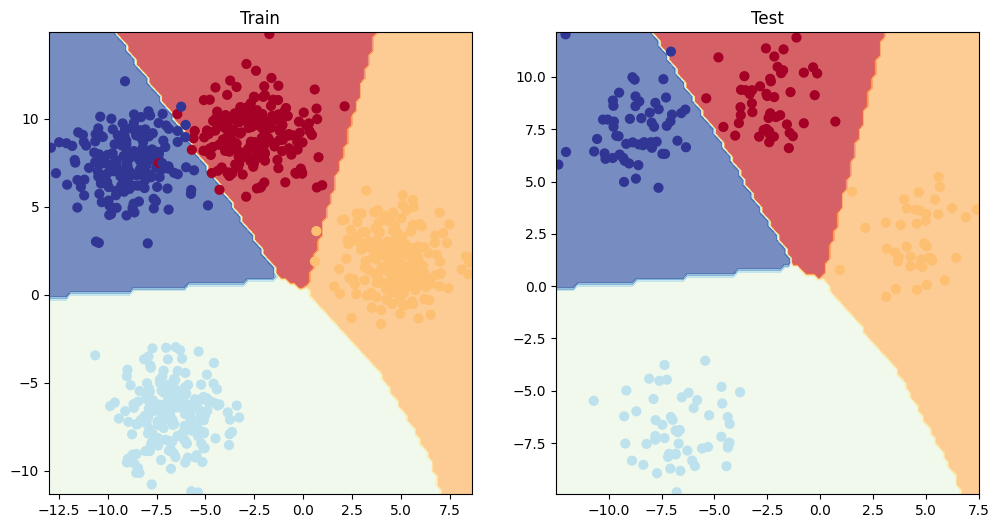

In [570]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

### 9. A few more classification metrics....(to evaluate our classification model)

* Accuracy - out of 100 samples , how many does our mmodel get right ?

* Precision
* Recall
* F1-score
* Confusion matrix
* classification report

